In [0]:

# Code to read csv file into colaboratory:# Code  
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'10Xf2Xv_pfnIycH2HpNZR3SwWHiHdrqzX'}) # replace the id with id of file you want to access
downloaded.GetContentFile('handwritten.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('handwritten.csv')

In [0]:
!pip install -q keras
!pip install -q numpy
!pip install -q sklearn
!pip install -q matplotlib
!pip install -q pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split

# Load the Data

In [4]:
# Get the data from the csv file
data = data.values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


# Data Prep

In [5]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

classes = np.unique(Y_train)
num_classes = len(classes)

X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

## Normalize Images

In [0]:
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_train = (X_train - mean_image)/255
X_test = (X_test - mean_image)/255

In [8]:
from keras.utils import to_categorical

Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)
print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Using TensorFlow backend.


Original Label: 17
One Hot Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


# Testing Layers

In [0]:
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import LeakyReLU, ELU
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

from tensorflow.python.keras import initializers

optimizer = Adam(lr=1e-3)

In [11]:
model = Sequential()

#conv
#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
    #dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
    #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
    #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
model.add(Conv2D(filters=16, kernel_size=8, strides = 1, padding='same', activation='linear',
                 bias_initializer='RandomNormal', input_shape=(img_size,img_size,1)))

#ReLu
model.add(LeakyReLU(alpha=0.1))

#conv2
model.add(Conv2D(filters=8, kernel_size=8, strides = 2, padding='same', activation='linear',
                 bias_initializer='RandomNormal', input_shape=(img_size,img_size,1)))

#ReLu
model.add(LeakyReLU(alpha=0.1))

#MaxPool
#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
model.add(MaxPooling2D(strides=1, padding='same'))

#Affine
model.add(Flatten())

#keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
    #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
    #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
#model.add(Dense(56, activation="relu"))
    
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1040      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         8200      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                40794     
Total para

In [12]:
model_train = model.fit(x=X_train,
          y=Y_train,
          epochs=10, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))

Train on 238103 samples, validate on 59526 samples
Epoch 1/10
238103/238103 [==============================] - 32s 135us/step - loss: 0.2781 - acc: 0.9235 - val_loss: 0.1382 - val_acc: 0.9611
Epoch 2/10
 52736/238103 [=====>........................] - ETA: 20s - loss: 0.1251 - acc: 0.9666

238103/238103 [==============================] - 29s 121us/step - loss: 0.1177 - acc: 0.9690 - val_loss: 0.1091 - val_acc: 0.9714
Epoch 3/10
153728/238103 [==================>...........] - ETA: 9s - loss: 0.0986 - acc: 0.9740

238103/238103 [==============================] - 29s 121us/step - loss: 0.0988 - acc: 0.9739 - val_loss: 0.1013 - val_acc: 0.9728
Epoch 4/10
191616/238103 [=======================>......] - ETA: 5s - loss: 0.0869 - acc: 0.9769

238103/238103 [==============================] - 29s 121us/step - loss: 0.0871 - acc: 0.9769 - val_loss: 0.0902 - val_acc: 0.9755
Epoch 5/10
206720/238103 [=========================>....] - ETA: 3s - loss: 0.0760 - acc: 0.9801

238103/238103 [==============================] - 29s 121us/step - loss: 0.0763 - acc: 0.9799 - val_loss: 0.0819 - val_acc: 0.9784
Epoch 6/10
212352/238103 [=========================>....] - ETA: 2s - loss: 0.0690 - acc: 0.9816

238103/238103 [==============================] - 29s 121us/step - loss: 0.0696 - acc: 0.9813 - val_loss: 0.0854 - val_acc: 0.9777
Epoch 7/10
214272/238103 [=========================>....] - ETA: 2s - loss: 0.0636 - acc: 0.9830

238103/238103 [==============================] - 29s 121us/step - loss: 0.0635 - acc: 0.9830 - val_loss: 0.0791 - val_acc: 0.9790
Epoch 8/10
214912/238103 [==========================>...] - ETA: 2s - loss: 0.0580 - acc: 0.9843

238103/238103 [==============================] - 29s 121us/step - loss: 0.0588 - acc: 0.9842 - val_loss: 0.0766 - val_acc: 0.9800
Epoch 9/10
216064/238103 [==========================>...] - ETA: 2s - loss: 0.0541 - acc: 0.9853

238103/238103 [==============================] - 29s 120us/step - loss: 0.0547 - acc: 0.9852 - val_loss: 0.0801 - val_acc: 0.9792
Epoch 10/10
215040/238103 [==========================>...] - ETA: 2s - loss: 0.0505 - acc: 0.9860

238103/238103 [==============================] - 29s 120us/step - loss: 0.0508 - acc: 0.9861 - val_loss: 0.0742 - val_acc: 0.9807


In [13]:
test_eval = model.evaluate(X_test, Y_test_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.07555150274848345
Test accuracy: 0.9810504246855177


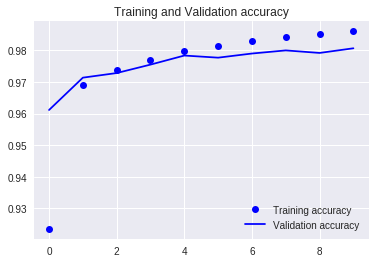

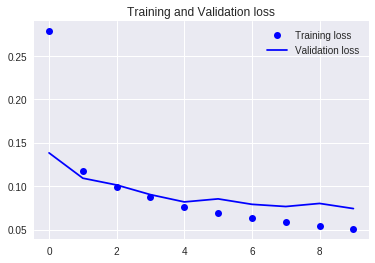

In [14]:

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()